# Module 2 Project

In [8]:
import pandas as pd
import sqlite3
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
conn = sqlite3.connect('database.sqlite')

c = conn.cursor()

# Initial examination of database

In [10]:
# https://www.kaggle.com/laudanum/footballdelphi
# Used SQL and schema from kaggle to export data from the four tables
# to panda dataframe and examine there

c.execute("""
SELECT *
FROM Matches
""")
df_matches = pd.DataFrame(c.fetchall())
df_matches.columns = [x[0] for x in c.description]
print(df_matches.info())
print(df_matches.shape)
df_matches




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 9 columns):
Match_ID    24625 non-null int64
Div         24625 non-null object
Season      24625 non-null int64
Date        24625 non-null object
HomeTeam    24625 non-null object
AwayTeam    24625 non-null object
FTHG        24625 non-null int64
FTAG        24625 non-null int64
FTR         24625 non-null object
dtypes: int64(4), object(5)
memory usage: 1.7+ MB
None
(24625, 9)


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A
...,...,...,...,...,...,...,...,...,...
24620,46770,E0,2016,2017-05-21,Liverpool,Middlesbrough,3,0,H
24621,46771,E0,2016,2017-05-21,Man United,Crystal Palace,2,0,H
24622,46772,E0,2016,2017-05-21,Southampton,Stoke,0,1,A
24623,46773,E0,2016,2017-05-21,Swansea,West Brom,2,1,H


In [11]:


c.execute("""
SELECT *
FROM Teams""")
df_teams = pd.DataFrame(c.fetchall())
df_teams.columns = [x[0] for x in c.description]
print(df_teams.shape)
print(df_teams.info())
df_teams



(468, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
Season                    468 non-null object
TeamName                  468 non-null object
KaderHome                 468 non-null object
AvgAgeHome                468 non-null object
ForeignPlayersHome        468 non-null object
OverallMarketValueHome    468 non-null object
AvgMarketValueHome        468 non-null object
StadiumCapacity           468 non-null object
dtypes: object(8)
memory usage: 29.4+ KB
None


,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271
...,...,...,...,...,...,...,...,...
463,2005,Paderborn,33,24,13,7530000,228000,47728
464,2005,Unterhaching,28,26,9,7030000,251000,47728
465,2005,Offenbach,28,26,13,6280000,224000,47728
466,2005,Siegen,29,26,13,6180000,213000,47728


In [12]:
# Examine Shape of Database

c.execute("""
SELECT *
FROM Teams_in_Matches""")
df_teams_in_matches = pd.DataFrame(c.fetchall())
df_teams_in_matches.columns = [x[0] for x in c.description]
print(df_teams_in_matches.shape)
print(df_teams_in_matches.info())
df_teams_in_matches



(49148, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49148 entries, 0 to 49147
Data columns (total 2 columns):
Match_ID          49148 non-null int64
Unique_Team_ID    49148 non-null int64
dtypes: int64(2)
memory usage: 768.1 KB
None


,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26
...,...,...
49143,46772,123
49144,46773,117
49145,46773,126
49146,46774,85


In [13]:
# Examine Shape of Database

c.execute("""
SELECT *
FROM Unique_Teams""")
df_unique_teams = pd.DataFrame(c.fetchall())
df_unique_teams.columns = [x[0] for x in c.description]
print(df_unique_teams.shape)
print(df_unique_teams.info())
df_unique_teams



(128, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
TeamName          128 non-null object
Unique_Team_ID    128 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
None


,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5
...,...,...
123,Burnley,124
124,Blackpool,125
125,Swansea,126
126,Cardiff,127


In [14]:
c.execute("""
SELECT *
FROM Matches
WHERE Season = 2011
""")
df_matches = pd.DataFrame(c.fetchall())
df_matches.columns = [x[0] for x in c.description]
df_matches

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A


In [15]:
df_matches['HomeTeam'].nunique()

56

In [16]:
df_unique_teams.nunique()

TeamName          128
Unique_Team_ID    128
dtype: int64

# First Question: Total Number of Goals Scored Per Team in 2011 Season

In [17]:
#number of goals scored in home matches per team

Home_Goals = df_matches.groupby('HomeTeam')['FTHG'].sum()
Home_Goals

HomeTeam
Aachen                15
Arsenal               39
Aston Villa           20
Augsburg              20
Bayern Munich         49
Blackburn             26
Bochum                23
Bolton                23
Braunschweig          21
Chelsea               41
Cottbus               18
Dortmund              44
Dresden               30
Duisburg              23
Ein Frankfurt         38
Erzgebirge Aue        19
Everton               28
FC Koln               20
Fortuna Dusseldorf    35
Frankfurt FSV         20
Freiburg              24
Fulham                36
Greuther Furth        46
Hamburg               19
Hannover              31
Hansa Rostock         20
Hertha                19
Hoffenheim            21
Ingolstadt            28
Kaiserslautern        12
Karlsruhe             23
Leverkusen            28
Liverpool             24
M'gladbach            29
Mainz                 27
Man City              55
Man United            52
Munich 1860           35
Newcastle             29
Norwich         

In [18]:
#number of goals scored in away matches per team

Away_Goals = df_matches.groupby('AwayTeam')['FTAG'].sum()
Away_Goals

AwayTeam
Aachen                15
Arsenal               35
Aston Villa           17
Augsburg              16
Bayern Munich         28
Blackburn             22
Bochum                18
Bolton                23
Braunschweig          16
Chelsea               24
Cottbus               12
Dortmund              36
Dresden               20
Duisburg              19
Ein Frankfurt         38
Erzgebirge Aue        12
Everton               22
FC Koln               19
Fortuna Dusseldorf    29
Frankfurt FSV         23
Freiburg              21
Fulham                12
Greuther Furth        27
Hamburg               16
Hannover              10
Hansa Rostock         14
Hertha                19
Hoffenheim            20
Ingolstadt            15
Kaiserslautern        12
Karlsruhe             11
Leverkusen            24
Liverpool             23
M'gladbach            20
Mainz                 20
Man City              38
Man United            37
Munich 1860           27
Newcastle             27
Norwich         

In [19]:
#combined home goals and away golas into total goals per team

Home_Goals = df_matches.groupby('HomeTeam')['FTHG'].sum()
Away_Goals = df_matches.groupby('AwayTeam')['FTAG'].sum()

df_Total_Goals = pd.DataFrame(data = Home_Goals + Away_Goals).reset_index()

df_Total_Goals.columns = ['TeamName', 'TotalGoals']
df_Total_Goals

,TeamName,TotalGoals
0,Aachen,30
1,Arsenal,74
2,Aston Villa,37
3,Augsburg,36
4,Bayern Munich,77
5,Blackburn,48
6,Bochum,41
7,Bolton,46
8,Braunschweig,37
9,Chelsea,65


# Question 2: Total Number of Wins Per Team in 2011 Season

In [20]:
#calculate home wins and away wins and combine for total wins

Home_Wins = df_matches[df_matches['FTR'] == 'H']['HomeTeam'].value_counts()
Away_Wins = df_matches[df_matches['FTR'] == 'A']['AwayTeam'].value_counts()

df_Total_Wins = pd.DataFrame(data = Home_Wins + Away_Wins).reset_index()
df_Total_Wins.columns = ['TeamName', 'TotalWins']
df_Total_Wins

,TeamName,TotalWins
0,Aachen,6
1,Arsenal,21
2,Aston Villa,7
3,Augsburg,8
4,Bayern Munich,23
5,Blackburn,8
6,Bochum,10
7,Bolton,10
8,Braunschweig,10
9,Chelsea,18


In [21]:
#combine total goals and total wins into one dataframe

df_goals_and_wins = pd.merge(df_Total_Goals, df_Total_Wins, on='TeamName')

df_goals_and_wins

,TeamName,TotalGoals,TotalWins
0,Aachen,30,6
1,Arsenal,74,21
2,Aston Villa,37,7
3,Augsburg,36,8
4,Bayern Munich,77,23
5,Blackburn,48,8
6,Bochum,41,10
7,Bolton,46,10
8,Braunschweig,37,10
9,Chelsea,65,18


# Question 3: Visualisation of Each Team's Wins and Losses in 2011 Season

In [22]:
#Calculated total losses 

Away_losses = df_matches[df_matches['FTR'] == 'A']['HomeTeam'].value_counts()
Home_losses = df_matches[df_matches['FTR'] == 'H']['AwayTeam'].value_counts()

df_Total_Losses = pd.DataFrame(data = (Away_losses + Home_losses)).reset_index()
df_Total_Losses.columns = ['TeamName', 'TotalLosses']
df_Total_Losses['TotalLosses'].fillna(0, inplace=True)
df_Total_Losses

,TeamName,TotalLosses
0,Aachen,15.0
1,Arsenal,10.0
2,Aston Villa,14.0
3,Augsburg,12.0
4,Bayern Munich,7.0
5,Blackburn,23.0
6,Bochum,17.0
7,Bolton,22.0
8,Braunschweig,9.0
9,Chelsea,10.0


In [23]:
#combine total goals, total wins and total losses for each team in 2011 season into one dataframe

df_goals_and_wins_and_losses = pd.merge(df_goals_and_wins, df_Total_Losses, on='TeamName')

df_goals_and_wins_and_losses

,TeamName,TotalGoals,TotalWins,TotalLosses
0,Aachen,30,6,15.0
1,Arsenal,74,21,10.0
2,Aston Villa,37,7,14.0
3,Augsburg,36,8,12.0
4,Bayern Munich,77,23,7.0
5,Blackburn,48,8,23.0
6,Bochum,41,10,17.0
7,Bolton,46,10,22.0
8,Braunschweig,37,10,9.0
9,Chelsea,65,18,10.0


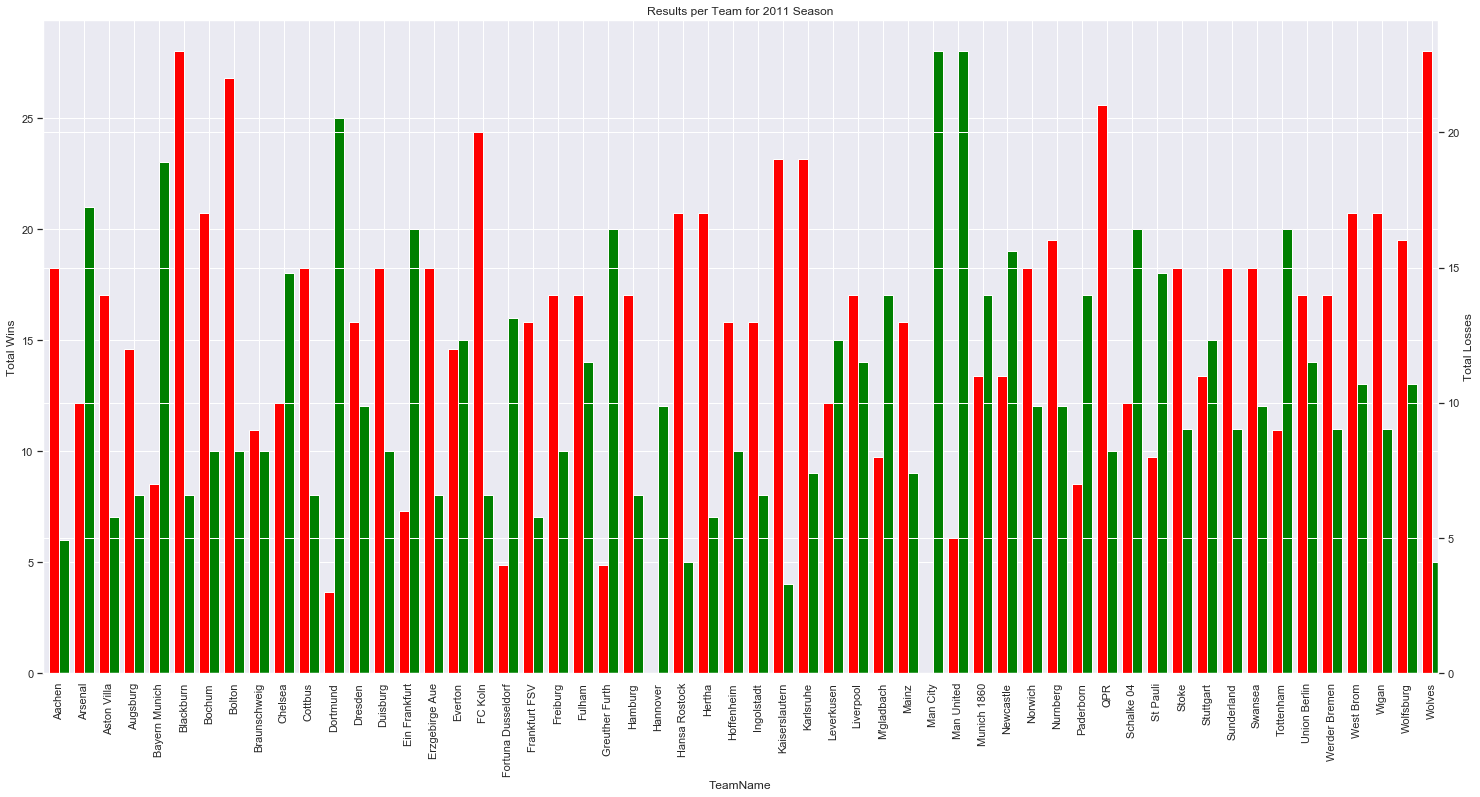

In [24]:
#Plotted all teams on same chart for easy comparison between teams
#set two different y axes on same chart, one for Total Wins and one for Total Losses

sns.set()

df = df_goals_and_wins_and_losses.set_index('TeamName')

fig = plt.figure(figsize=(25,12)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width = .4

df.TotalWins.plot(kind='bar',color='green',ax=ax,width=width, position=0, )
df.TotalLosses.plot(kind='bar',color='red', ax=ax2,width=width,  position=1, )

plt.title('Results per Team for 2011 Season')

ax.set_ylabel('Total Wins')

ax2.set_ylabel('Total Losses')

plt.show()

# Question 4: Calculate Each Team's Win % in the Rain 

In [25]:
import time
import datetime
import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [26]:
#Converted date strins into DateTime Format

def convert(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d')

d = convert('2012-03-31')



df_matches.Date = df_matches.Date.astype(str)

df_matches.info()

df_matches['DateTime'] = df_matches['Date'].map(lambda x : convert(x))

df_matches

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 9 columns):
Match_ID    992 non-null int64
Div         992 non-null object
Season      992 non-null int64
Date        992 non-null object
HomeTeam    992 non-null object
AwayTeam    992 non-null object
FTHG        992 non-null int64
FTAG        992 non-null int64
FTR         992 non-null object
dtypes: int64(4), object(5)
memory usage: 69.9+ KB


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,DateTime
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,2012-03-31
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,2011-12-11
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,2011-08-13
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,2011-11-27
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,2012-02-18
...,...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A,2012-05-13
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H,2012-05-13
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H,2012-05-13
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A,2012-05-13


In [27]:
#converted date into TimeStamp format - was having issues using DateTime format with DarkSky API


#tested method first
s= '2010-04-04'
time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())



1270335600.0

In [28]:
#used lambda function to apply to whole column

df_matches['TimeStamp'] = df_matches['Date'].map(lambda x: time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d").timetuple()))

df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 11 columns):
Match_ID     992 non-null int64
Div          992 non-null object
Season       992 non-null int64
Date         992 non-null object
HomeTeam     992 non-null object
AwayTeam     992 non-null object
FTHG         992 non-null int64
FTAG         992 non-null int64
FTR          992 non-null object
DateTime     992 non-null datetime64[ns]
TimeStamp    992 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 85.4+ KB


In [29]:
#converted TimeStamp from float to integer for easier parsing
df_matches.TimeStamp = df_matches.TimeStamp.astype(int)

df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 11 columns):
Match_ID     992 non-null int64
Div          992 non-null object
Season       992 non-null int64
Date         992 non-null object
HomeTeam     992 non-null object
AwayTeam     992 non-null object
FTHG         992 non-null int64
FTAG         992 non-null int64
FTR          992 non-null object
DateTime     992 non-null datetime64[ns]
TimeStamp    992 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 85.4+ KB


In [30]:
import json
#saved api_key on to computer and set up link
#for security purposes

def get_keys(path):
    with open(path) as f:
        return json.load(f)
                         


keys = get_keys("/Users/apple/.secret/darksky_api.json")

api_key = keys['api_key']


In [31]:
#Selected first TimeStamp value to use as a test
Time = df_matches['TimeStamp'][0]
Time

1333148400

In [32]:
#Connected to DarSkyApi with test timestamp

r = requests.get(f'https://api.darksky.net/forecast/{api_key}/52.5200,13.4050,1333148400')
r.status_code == requests.codes.ok

True

In [33]:
#examin result from api to understand shape of data and find useful information relating to rain

print(r.text)

r.json().keys()

for key in r.json().keys():
    print(key)
    value = r.json()[key] #Use standard dictionary formatting
    print(type(value)) #What type is it?
    print('\n\n') #Separate out data

{"latitude":52.52,"longitude":13.405,"timezone":"Europe/Berlin","currently":{"time":1333148400,"summary":"Mostly Cloudy","icon":"partly-cloudy-night","precipIntensity":0,"precipProbability":0,"temperature":46.41,"apparentTemperature":39.23,"dewPoint":40.73,"humidity":0.8,"windSpeed":18.42,"windGust":18.42,"windBearing":287,"cloudCover":0.75,"uvIndex":0,"visibility":6.216},"hourly":{"summary":"Drizzle in the morning and afternoon.","icon":"rain","data":[{"time":1333144800,"summary":"Mostly Cloudy","icon":"partly-cloudy-night","precipIntensity":0,"precipProbability":0,"temperature":46.41,"apparentTemperature":40.06,"dewPoint":40.56,"humidity":0.8,"windSpeed":14.96,"windGust":14.96,"windBearing":292,"cloudCover":0.75,"uvIndex":0,"visibility":6.216},{"time":1333148400,"summary":"Mostly Cloudy","icon":"partly-cloudy-night","precipIntensity":0,"precipProbability":0,"temperature":46.41,"apparentTemperature":39.23,"dewPoint":40.73,"humidity":0.8,"windSpeed":18.42,"windGust":18.42,"windBearing"

In [34]:
#Daily data has an icon representing weather for the day. If this is 'rain' I will count 
#the match as occuring in rainy conditions

r.json()['daily']['data'][0]['icon']

'rain'

In [35]:
#set up test list and test dataframe to experiment with API without exceeding daily limit

TimeStamp_List = list(df_matches['TimeStamp'])

TEST_LIST = TimeStamp_List[0:10]

df_test = df_matches.head()

df_test

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,DateTime,TimeStamp
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,2012-03-31,1333148400
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,2011-12-11,1323561600
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,2011-08-13,1313190000
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,2011-11-27,1322352000
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,2012-02-18,1329523200


In [36]:
#set values for berlin latitude and longitude
berlin_lat = 52.5200
berlin_lon = 13.4050

In [37]:
# def weather_day(self, date):
#         api_key = self.get_keys()
#         weather = requests.get(self.url.format(api_key,self.lat,self.long,date))
# #         f_json = weather.json()
#         weather =  weather.json()['daily']['data'][0]['icon']
#         return weather
    
    
# def weather_list(self, date_list = []):
#         weather_dict = {'date': [], 'weather':[]}
#         for date in date_list:
#             weather_dict['date'].append(date)
#             weather_dict['weather'].append(self.weather_day(date))
#         return weather_dict

In [40]:
#Found that not every day has an icon key. For these days I will set the value equal to 0
#and consider them as non-rainy
#There were two ways of doing this, either using .get() or try: and except:

weather_list = []
list_of_dates = TEST_LIST
lat = berlin_lat
lon = berlin_lon

for date in list_of_dates:
        link = f'https://api.darksky.net/forecast/{api_key}/{lat},{lon},{date}'
        r = requests.get(link)
        darksky = r.json()
        weather = darksky['daily']['data'][0].get('icon', 0)
#         try:
#             weather = darksky['daily']['data'][0]['icon']
#         except KeyError:
#             weather = 0
#    
        weather_list.append(weather)
        
weather_list

['rain',
 'partly-cloudy-day',
 'partly-cloudy-day',
 'wind',
 'partly-cloudy-day',
 'rain',
 'partly-cloudy-day',
 'partly-cloudy-day',
 'rain',
 0]

In [41]:
#number of unique dates is far less than number of total dates
print(len(list(df_matches['TimeStamp'])))
print(len(list(df_matches['TimeStamp'].unique())))

992
165


In [42]:
#found weather for each unique TimeStamp and stored results as a dictionary

lat = berlin_lat
lon = berlin_lon
list_of_dates = list(df_matches['TimeStamp'].unique())
weather_dict = {'TimeStamp': [], 'weather':[]}

for date in list_of_dates:
        link = f'https://api.darksky.net/forecast/{api_key}/{lat},{lon},{date}'
        r = requests.get(link)
        darksky = r.json()
        try:
            weather = darksky['daily']['data'][0]['icon']
        except KeyError:
            weather = 0
        weather_dict['TimeStamp'].append(date)
        weather_dict['weather'].append(weather)
    
        
        
weather_dict

{'TimeStamp': [1333148400,
  1323561600,
  1313190000,
  1322352000,
  1329523200,
  1327017600,
  1328313600,
  1334962800,
  1316300400,
  1319324400,
  1317423600,
  1330732800,
  1314399600,
  1331942400,
  1320537600,
  1336172400,
  1334098800,
  1324080000,
  1328227200,
  1319842800,
  1327190400,
  1322870400,
  1334358000,
  1332633600,
  1331337600,
  1333753200,
  1321660800,
  1318546800,
  1316818800,
  1335567600,
  1324166400,
  1330646400,
  1331856000,
  1329436800,
  1312585200,
  1320364800,
  1316127600,
  1310684400,
  1336258800,
  1328918400,
  1317510000,
  1333062000,
  1319238000,
  1314313200,
  1312671600,
  1330041600,
  1310857200,
  1329004800,
  1313967600,
  1315522800,
  1333234800,
  1316905200,
  1334876400,
  1322179200,
  1331251200,
  1320624000,
  1315609200,
  1313881200,
  1316991600,
  1332716400,
  1319929200,
  1329091200,
  1330214400,
  1324252800,
  1331424000,
  1322265600,
  1335135600,
  1323993600,
  1320451200,
  1334012400,
  13344

In [43]:
#converted the output to a dataframe with TimeStamp and weather
df_weather = pd.DataFrame.from_dict(weather_dict)
df_weather

,TimeStamp,weather
0,1333148400,rain
1,1323561600,partly-cloudy-day
2,1313190000,partly-cloudy-day
3,1322352000,wind
4,1329523200,partly-cloudy-day
...,...,...
160,1335826800,0
161,1335913200,0
162,1336345200,partly-cloudy-day
163,1336431600,partly-cloudy-day


In [44]:
#43 instances of rain
df_weather['weather'].value_counts()

partly-cloudy-day    71
0                    47
rain                 43
wind                  1
snow                  1
cloudy                1
clear-day             1
Name: weather, dtype: int64

In [46]:
#converted weather column to a 1 (rain) or 0 (no rain)
df_weather.loc[df_weather['weather'] != 'rain', 'weather'] = 0
df_weather.loc[df_weather['weather'] == 'rain', 'weather'] = 1

In [47]:
#check against previous value counts, still 43 instances of rain
df_weather['weather'].value_counts()

0    122
1     43
Name: weather, dtype: int64

In [48]:
#merge this dataframe with matches dataframe

df_matches = df_matches.merge(df_weather,how='left',left_on='TimeStamp',right_on='TimeStamp')

In [49]:
df_matches

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,DateTime,TimeStamp,weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,2012-03-31,1333148400,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,2011-12-11,1323561600,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,2011-08-13,1313190000,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,2011-11-27,1322352000,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,2012-02-18,1329523200,0
...,...,...,...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A,2012-05-13,1336863600,0
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H,2012-05-13,1336863600,0
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H,2012-05-13,1336863600,0
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A,2012-05-13,1336863600,0


In [50]:
#rename column from weather to rain
df_matches.rename(columns={'weather':'rain'}, inplace=True)

In [51]:
df_matches

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,DateTime,TimeStamp,rain
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,2012-03-31,1333148400,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,2011-12-11,1323561600,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,2011-08-13,1313190000,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,2011-11-27,1322352000,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,2012-02-18,1329523200,0
...,...,...,...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A,2012-05-13,1336863600,0
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H,2012-05-13,1336863600,0
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H,2012-05-13,1336863600,0
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A,2012-05-13,1336863600,0


In [59]:
#create a new dataframe of only the matches that took place under rainy conditions in 2011 Season
df_rain = df_matches[df_matches['rain'] == 1]

In [61]:

df_rain.reset_index(inplace=True)

df_rain

,level_0,index,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,DateTime,TimeStamp,rain
0,0,0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,2012-03-31,1333148400,1
1,1,5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,2012-01-20,1327017600,1
2,2,8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,2011-09-18,1316300400,1
3,3,15,1107,D1,2011,2012-05-05,FC Koln,Bayern Munich,1,4,A,2012-05-05,1336172400,1
4,4,18,1110,D1,2011,2011-12-17,Freiburg,Dortmund,1,4,A,2011-12-17,1324080000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,214,975,44858,E0,2011,2012-05-06,Fulham,Sunderland,2,1,H,2012-05-06,1336258800,1
215,215,976,44859,E0,2011,2012-05-06,Man United,Swansea,2,0,H,2012-05-06,1336258800,1
216,216,977,44860,E0,2011,2012-05-06,Newcastle,Man City,0,2,A,2012-05-06,1336258800,1
217,217,978,44861,E0,2011,2012-05-06,QPR,Stoke,1,0,H,2012-05-06,1336258800,1


In [80]:
#Swansea played no matches in the rain

print(df_matches['HomeTeam'].nunique())
print(df_rain['HomeTeam'].nunique())

set(df_matches['HomeTeam'].unique()) - set(df_rain['HomeTeam'].unique())



56
55


{'Swansea'}

In [81]:
#Created a new dataframe for Total Wins in the rain per team

Home_Wins = df_rain[df_rain['FTR'] == 'H']['HomeTeam'].value_counts()
Away_Wins = df_rain[df_rain['FTR'] == 'A']['AwayTeam'].value_counts()

df_rain_wins = pd.DataFrame(data = Home_Wins + Away_Wins).reset_index()
df_rain_wins.columns = ['TeamName', 'RainWins']
df_rain_wins.fillna(0, inplace=True)



In [82]:
#Created a new dataframe for Total Losses in the rain per team

Away_losses = df_rain[df_rain['FTR'] == 'A']['HomeTeam'].value_counts()
Home_losses = df_rain[df_rain['FTR'] == 'H']['AwayTeam'].value_counts()

df_rain_losses = pd.DataFrame(data = (Away_losses + Home_losses)).reset_index()
df_rain_losses.columns = ['TeamName', 'RainLosses']
df_rain_losses.fillna(0, inplace=True)
df_rain_losses

,TeamName,RainLosses
0,Aachen,0.0
1,Arsenal,4.0
2,Aston Villa,0.0
3,Bayern Munich,2.0
4,Blackburn,4.0
5,Bochum,5.0
6,Bolton,4.0
7,Braunschweig,0.0
8,Chelsea,0.0
9,Cottbus,3.0


In [83]:
#Merged both dataframes for both wins and losses in the rain

df_rain_wins_and_losses = pd.merge(df_rain_wins, df_rain_losses, on='TeamName')

df_rain_wins_and_losses

,TeamName,RainWins,RainLosses
0,Aachen,0.0,0.0
1,Arsenal,3.0,4.0
2,Bayern Munich,5.0,2.0
3,Blackburn,0.0,4.0
4,Bochum,2.0,5.0
5,Bolton,0.0,4.0
6,Braunschweig,4.0,0.0
7,Chelsea,5.0,0.0
8,Cottbus,2.0,3.0
9,Dortmund,5.0,0.0


In [84]:
#Used wins and losses to calculate win % in the rain, rounded to the nearest integer
df_rain_wins_and_losses['RainWin%'] = round(
    (df_rain_wins_and_losses.RainWins/(df_rain_wins_and_losses.RainWins+df_rain_wins_and_losses.RainLosses) * 100), 0)

df_rain_wins_and_losses.fillna(0, inplace=True)

df_rain_wins_and_losses

,TeamName,RainWins,RainLosses,RainWin%
0,Aachen,0.0,0.0,0.0
1,Arsenal,3.0,4.0,43.0
2,Bayern Munich,5.0,2.0,71.0
3,Blackburn,0.0,4.0,0.0
4,Bochum,2.0,5.0,29.0
5,Bolton,0.0,4.0,0.0
6,Braunschweig,4.0,0.0,100.0
7,Chelsea,5.0,0.0,100.0
8,Cottbus,2.0,3.0,40.0
9,Dortmund,5.0,0.0,100.0


In [85]:
#Used my results to retrospectively make a Class for WeatherGetter that could be used for future projects

class WeatherGetter(object):
    
 
    def __init__(self,lat,long):
        self.lat = lat
        self.long = long
        self.url = 'https://api.darksky.net/forecast/{}/{},{},{}'
        
         
    def get_keys(self,path="/Users/apple/.secret/darksky_api.json"):
        with open(path) as f:
            keys = json.load(f)
        return keys["api_key"]

    def weather_day(self, date):
        api_key = self.get_keys()
        weather = requests.get(self.url.format(api_key,self.lat,self.long,date))
        darksky = weather.json()
        try:
            weather = darksky['daily']['data'][0]['icon']
        except KeyError:
            weather = 0
        return weather
           
    def weather_list(self, date_list = []):
        weather_dict = {'TimeStamp': [], 'weather':[]}
        for date in date_list:
            weather_dict['TimeStamp'].append(date)
            weather_dict['weather'].append(self.weather_day(date))
        return weather_dict

In [86]:
#Tested WeatherGetter

lat = berlin_lat
long = berlin_lon

weather_test = WeatherGetter(berlin_lat, berlin_lon)
timestamp_weather = weather_test.weather_list(list(df_matches['TimeStamp'].head(10)))
df_timestamp_weather = pd.DataFrame(timestamp_weather)

df_timestamp_weather.loc[df_timestamp_weather['weather'] != 'rain', 'weather'] = 0
df_timestamp_weather.loc[df_timestamp_weather['weather'] == 'rain', 'weather'] = 1

df_timestamp_weather


,TimeStamp,weather
0,1333148400,1
1,1323561600,0
2,1313190000,0
3,1322352000,0
4,1329523200,0
5,1327017600,1
6,1328313600,0
7,1334962800,0
8,1316300400,1
9,1319324400,0


# Question 5: Upload to Mongo

In [96]:
#Merged RainWin% with goals, wins and losses into one final dataframe to upload to Mongo

df_final = pd.merge(df_goals_and_wins_and_losses, df_rain_wins_and_losses, on='TeamName')

df_final.drop(['RainWins', 'RainLosses'],axis=1, inplace=True)



df_final

,TeamName,TotalGoals,TotalWins,TotalLosses,RainWin%
0,Aachen,30,6,15.0,0.0
1,Arsenal,74,21,10.0,43.0
2,Bayern Munich,77,23,7.0,71.0
3,Blackburn,48,8,23.0,0.0
4,Bochum,41,10,17.0,29.0
5,Bolton,46,10,22.0,0.0
6,Braunschweig,37,10,9.0,100.0
7,Chelsea,65,18,10.0,100.0
8,Cottbus,30,8,15.0,40.0
9,Dortmund,80,25,3.0,100.0


In [97]:
#Connected to Mongo

import pymongo
import requests

myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

# grab a database from your server 
mydb = myclient['Football_Data']

myclient.list_database_names()





['Football_Data', 'admin', 'config', 'example_data', 'local']

In [98]:
mycollection = mydb['Football_Collection']
mydb.list_collection_names()

['Football_Collection']

In [99]:
#converted dataframe to a dictionary so it could be uploaded to Mongo

df_mongo = df_final.to_dict(orient = 'records')

In [100]:
df_mongo

[{'TeamName': 'Aachen',
  'TotalGoals': 30,
  'TotalWins': 6,
  'TotalLosses': 15.0,
  'RainWin%': 0.0},
 {'TeamName': 'Arsenal',
  'TotalGoals': 74,
  'TotalWins': 21,
  'TotalLosses': 10.0,
  'RainWin%': 43.0},
 {'TeamName': 'Bayern Munich',
  'TotalGoals': 77,
  'TotalWins': 23,
  'TotalLosses': 7.0,
  'RainWin%': 71.0},
 {'TeamName': 'Blackburn',
  'TotalGoals': 48,
  'TotalWins': 8,
  'TotalLosses': 23.0,
  'RainWin%': 0.0},
 {'TeamName': 'Bochum',
  'TotalGoals': 41,
  'TotalWins': 10,
  'TotalLosses': 17.0,
  'RainWin%': 29.0},
 {'TeamName': 'Bolton',
  'TotalGoals': 46,
  'TotalWins': 10,
  'TotalLosses': 22.0,
  'RainWin%': 0.0},
 {'TeamName': 'Braunschweig',
  'TotalGoals': 37,
  'TotalWins': 10,
  'TotalLosses': 9.0,
  'RainWin%': 100.0},
 {'TeamName': 'Chelsea',
  'TotalGoals': 65,
  'TotalWins': 18,
  'TotalLosses': 10.0,
  'RainWin%': 100.0},
 {'TeamName': 'Cottbus',
  'TotalGoals': 30,
  'TotalWins': 8,
  'TotalLosses': 15.0,
  'RainWin%': 40.0},
 {'TeamName': 'Dortmund'

In [101]:
#dataframe uploaded
mycollection.insert_many(df_mongo)

In [103]:
#test

query = mycollection.find({'TeamName':'Arsenal'})
for document in query:
    print(document)

{'_id': ObjectId('5e340dab5b0a5b441a3af8e9'), 'TeamName': 'Arsenal', 'TotalGoals': 74, 'TotalWins': 21, 'TotalLosses': 10.0, 'RainWin%': 43.0}


In [ ]:
class MongoHandler(object):
    def __init__(self):
        pass
    
    def insert_many(self,df):
        dictionary_df = self.to_dict(orient='records')
        self.insert_many(dictionary_df)
        return 'Mongo Done'



In [ ]:
TestMongo = MongoHandler()

In [ ]:
df_test

In [ ]:
TestMongo.insert_many(df_test)